In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset from a public URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv(url, header=None, names=column_names)

# Display the first 5 rows to inspect the data
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# Check the data types and look for missing values
print("\nDataset info and missing values:")
iris_df.info()

# Check for any missing values explicitly
print("\nMissing values per column:")
print(iris_df.isnull().sum())

# No missing values found, so no cleaning is needed for this dataset.

First 5 rows of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset info and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values per column:
sepal_length    0
sepal_width    

In [2]:
# Compute basic statistics for numerical columns
print("Basic statistics of the numerical columns:")
print(iris_df.describe())

# Group the data by 'species' and compute the mean of numerical columns for each group
print("\nMean of numerical features grouped by species:")
species_grouped = iris_df.groupby('species').mean()
print(species_grouped)

# Findings from the analysis:
# - Setosa has the smallest sepal and petal length, and the largest sepal width.
# - Virginica has the largest sepal and petal dimensions.
# - The petal length seems to be a key distinguishing feature between the species.

Basic statistics of the numerical columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Mean of numerical features grouped by species:
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


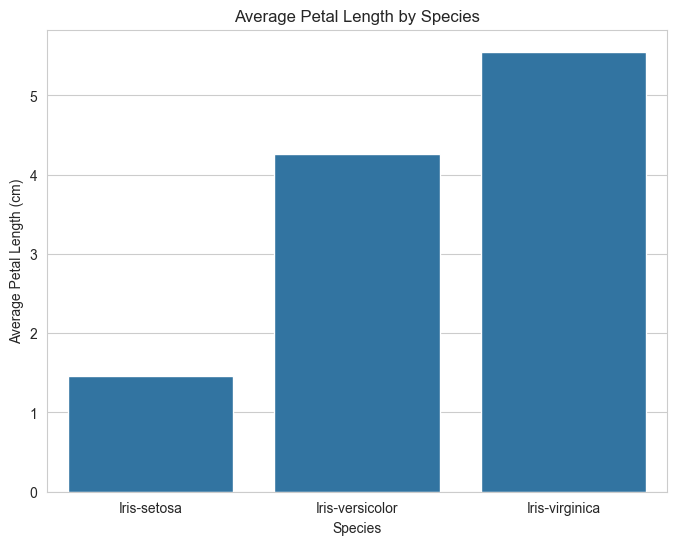

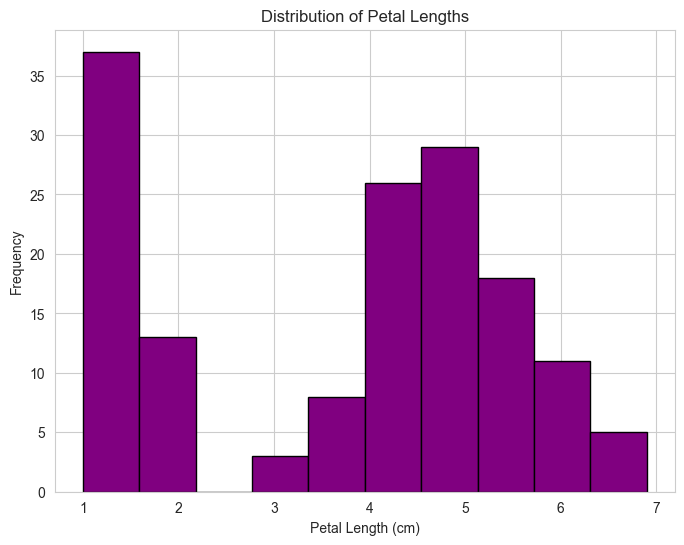

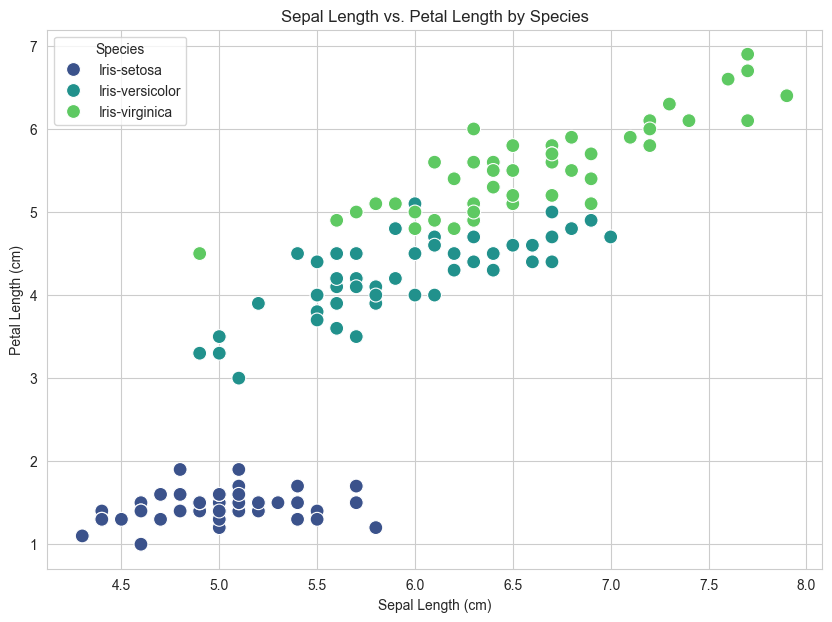

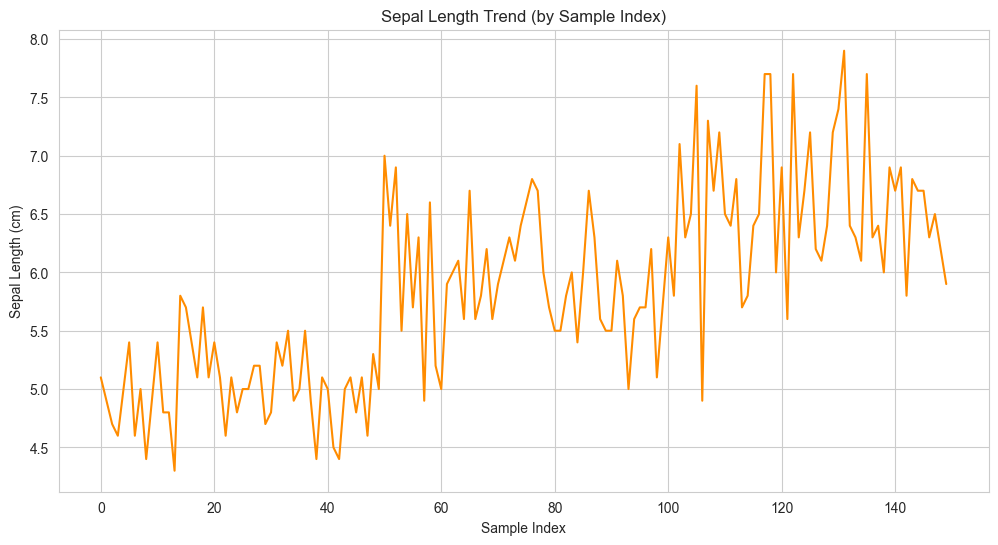

In [3]:
# Set a style for better-looking plots
sns.set_style("whitegrid")

# Visualization 1: Bar chart showing average petal length per species
plt.figure(figsize=(8, 6))
sns.barplot(x=species_grouped.index, y=species_grouped['petal_length'])
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.show()

# Visualization 2: Histogram of petal lengths
plt.figure(figsize=(8, 6))
plt.hist(iris_df['petal_length'], bins=10, color='purple', edgecolor='black')
plt.title('Distribution of Petal Lengths')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Scatter plot of sepal length vs. petal length
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris_df, palette='viridis', s=100)
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.show()

# Visualization 4: Line plot showing the trend of sepal length (using the row index as a proxy for time)
# Note: The Iris dataset is not a time-series dataset. This is for demonstration purposes only.
plt.figure(figsize=(12, 6))
plt.plot(iris_df.index, iris_df['sepal_length'], color='darkorange')
plt.title('Sepal Length Trend (by Sample Index)')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.show()